In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
delta_data = pd.read_csv('full_m5delta.csv')
delta_data.set_index('Unnamed: 0',inplace=True)
del delta_data.index.name

delta_data

,delta
2012-05-30 20:05:00,0.0
2012-05-30 20:10:00,0.0
2012-05-30 20:15:00,0.0
2012-05-30 20:20:00,0.0
2012-05-30 20:25:00,0.0
2012-05-30 20:30:00,0.0
2012-05-30 20:35:00,0.0
2012-05-30 20:40:00,0.0
2012-05-30 20:45:00,0.0
2012-05-30 20:50:00,0.0


In [3]:
delta_data.index = pd.to_datetime(delta_data.index)

In [4]:
# visualize monthly data
delta_mo = delta_data.resample('MS').sum()

(60000, 150000)

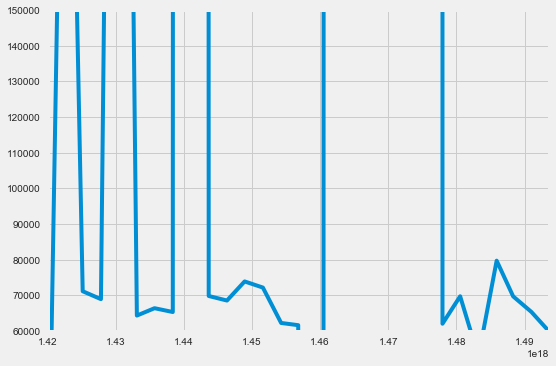

In [5]:
sns.tsplot(delta_mo.delta['2015':'2017'],delta_mo['2015':'2017'].index)
plt.ylim([60000,150000])

(1500, 2750)

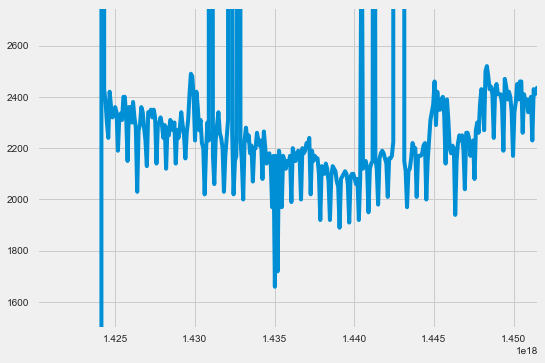

In [6]:
#visualize daily data
delta_day = delta_data.resample('D').sum()
sns.tsplot(delta_day['2015'].delta,delta_day['2015']
           .index)
plt.ylim([1500,2750])

In [7]:
delta_dayred = delta_day['2015':'2017']

###### Selecting optimal Parameters (p, d, q, P, D, Q, s) for ARIMA model

In [8]:
# use SARIMAX() function from statsmodels
help(itertools.product)

Help on class product in module itertools:

class product(builtins.object)
 |  product(*iterables, repeat=1) --> product object
 |  
 |  Cartesian product of input iterables.  Equivalent to nested for-loops.
 |  
 |  For example, product(A, B) returns the same as:  ((x,y) for x in A for y in B).
 |  The leftmost iterators are in the outermost for-loop, so the output tuples
 |  cycle in a manner similar to an odometer (with the rightmost element changing
 |  on every iteration).
 |  
 |  To compute the product of an iterable with itself, specify the number
 |  of repetitions with the optional repeat keyword argument. For example,
 |  product(A, repeat=4) means the same as product(A, A, A, A).
 |  
 |  product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
 |  product((0,1), (0,1), (0,1)) --> (0,0,0) (0,0,1) (0,1,0) (0,1,1) (1,0,0) ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /

In [9]:
list(itertools.product(range(0,2),range(0,2),range(0,2)))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [10]:
# Split into training and test set

numrows = delta_dayred.shape[0]
numrows
trainrows = numrows*65/100
trainrows = int(trainrows)

deltaday_train = delta_dayred.iloc[:trainrows,:]
deltaday_test = delta_dayred.iloc[trainrows:,:]

In [11]:
deltaday_train

,delta
2015-01-01,0.000000e+00
2015-01-02,0.000000e+00
2015-01-03,0.000000e+00
2015-01-04,0.000000e+00
2015-01-05,0.000000e+00
2015-01-06,0.000000e+00
2015-01-07,0.000000e+00
2015-01-08,0.000000e+00
2015-01-09,0.000000e+00
2015-01-10,0.000000e+00


In [12]:
deltaday_test

,delta
2016-07-26,1.396117e+06
2016-07-27,1.932584e+06
2016-07-28,7.399507e+05
2016-07-29,1.890000e+03
2016-07-30,1.860000e+03
2016-07-31,1.730000e+03
2016-08-01,1.850000e+03
2016-08-02,1.860000e+03
2016-08-03,1.940000e+03
2016-08-04,2.000000e+03


In [15]:
p = d = q = range(0,2)
S = range(1)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = list(itertools.product(p,d,q,S))

In [16]:
# Evaluation metric: AIC = Akaike Infromation Criterion; measures...
# ... how well model fits data - higher the AIC, better the params

warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(deltaday_train,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationary = False,
                                           enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 0) - AIC:17031.122185087843
ARIMA(0, 0, 0)x(1, 0, 0, 0) - AIC:16868.367946491777
ARIMA(0, 0, 0)x(1, 0, 1, 0) - AIC:16841.03140079236
ARIMA(0, 0, 1)x(0, 0, 0, 0) - AIC:17031.122185087843
ARIMA(0, 0, 1)x(0, 0, 1, 0) - AIC:17009.778667958257
ARIMA(0, 0, 1)x(1, 0, 0, 0) - AIC:16909.559858911274
ARIMA(0, 0, 1)x(1, 0, 1, 0) - AIC:16911.184322867754
ARIMA(0, 1, 0)x(0, 0, 1, 0) - AIC:16849.5836115309
ARIMA(0, 1, 0)x(1, 0, 0, 0) - AIC:16865.774964511154
ARIMA(0, 1, 0)x(1, 0, 1, 0) - AIC:16850.461466891044
ARIMA(0, 1, 1)x(0, 0, 0, 0) - AIC:16849.5836115309
ARIMA(0, 1, 1)x(0, 0, 1, 0) - AIC:16854.42647225803
ARIMA(0, 1, 1)x(1, 0, 0, 0) - AIC:16850.462283077683
ARIMA(0, 1, 1)x(1, 0, 1, 0) - AIC:16817.842080726245
ARIMA(1, 0, 0)x(0, 0, 0, 0) - AIC:16868.367946491777
ARIMA(1, 0, 0)x(0, 0, 1, 0) - AIC:16841.817804375754
ARIMA(1, 0, 0)x(1, 0, 0, 0) - AIC:16913.69011134726
ARIMA(1, 0, 0)x(1, 0, 1, 0) - AIC:16870.114768663138
ARIMA(1, 0, 1)x(0, 0, 0, 0) - AIC:16841.03140079236
A

In [18]:
# min AIC for ARIMA(0, 1, 1)x(1, 0, 1, 0) - AIC:16817.842080726245

mod = sm.tsa.statespace.SARIMAX(deltaday_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2973      0.017    -17.322      0.000      -0.331      -0.264
ar.S.L1        0.8179      0.015     52.932      0.000       0.788       0.848
ma.S.L1       -1.0159      0.004   -248.812      0.000      -1.024      -1.008
sigma2      3.841e+11   6.47e-14   5.94e+24      0.000    3.84e+11    3.84e+11


In [66]:
results

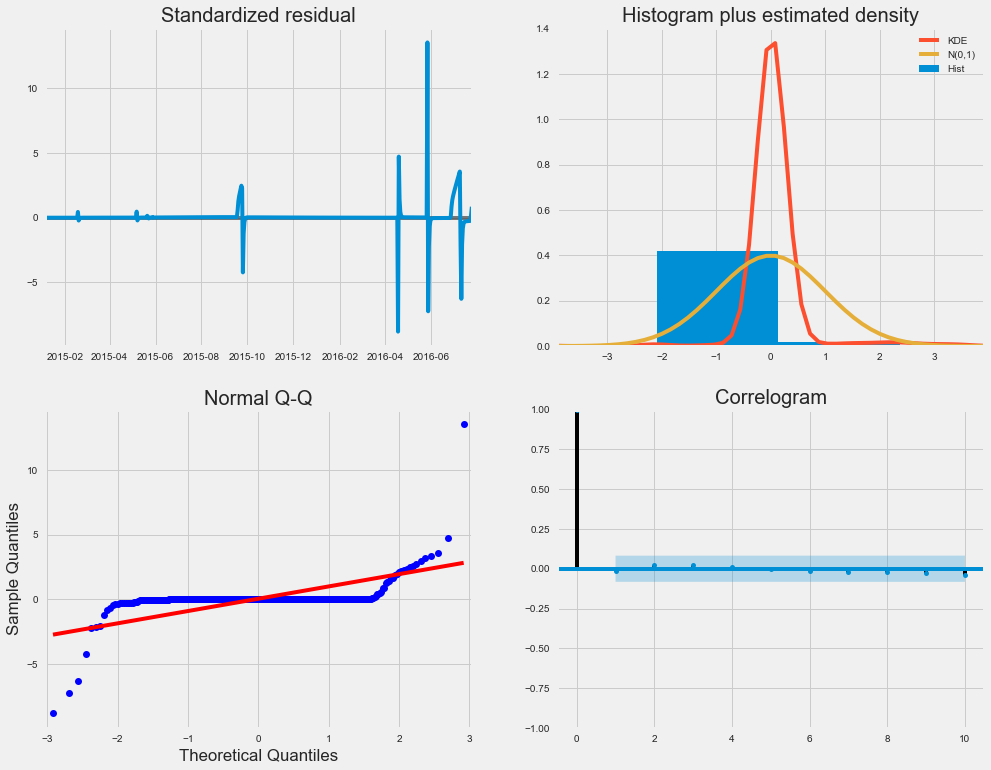

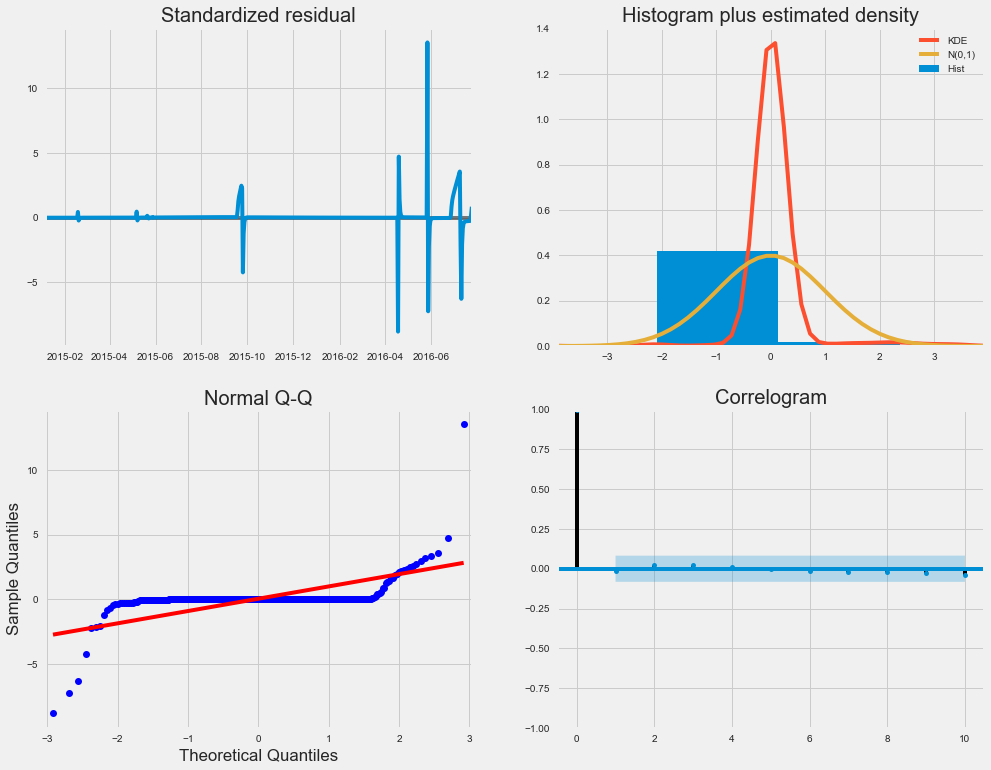

In [19]:
results.plot_diagnostics(figsize=(15, 12))


In [ ]:
# the residuals are not normally distributed - bars don't follow the KDE line
# Good that there is no correlation (from autocorrelation chart)
# We don't have a good model, but it could do - change params to make a better fit. 

In [75]:
time = (deltaday_train.index[-20]).date()
time


datetime.date(2016, 7, 6)

In [90]:
# Verifying Forecasts

pred = results.get_prediction(start = '2016-01-01', dynamic = False,full_results=True)

In [91]:
pred_ci = pred.conf_int()

In [92]:
pred_ci

,lower delta,upper delta
2016-01-01,-1.237496e+06,1.229572e+06
2016-01-02,-1.237408e+06,1.229691e+06
2016-01-03,-1.237338e+06,1.229791e+06
2016-01-04,-1.237333e+06,1.229826e+06
2016-01-05,-1.237170e+06,1.230017e+06
2016-01-06,-1.237053e+06,1.230162e+06
2016-01-07,-1.236981e+06,1.230261e+06
2016-01-08,-1.236907e+06,1.230361e+06
2016-01-09,-1.236839e+06,1.230454e+06
2016-01-10,-1.236800e+06,1.230518e+06


In [93]:
deltaday_test.index = pd.to_datetime(deltaday_test.index, format = '%Y-%m-%d')
deltaday_train.index = pd.to_datetime(deltaday_train.index, format = '%Y-%m-%d')

In [94]:
# have to use existing data only - cannot predict based on new timestamps!

(-10000, 10000)

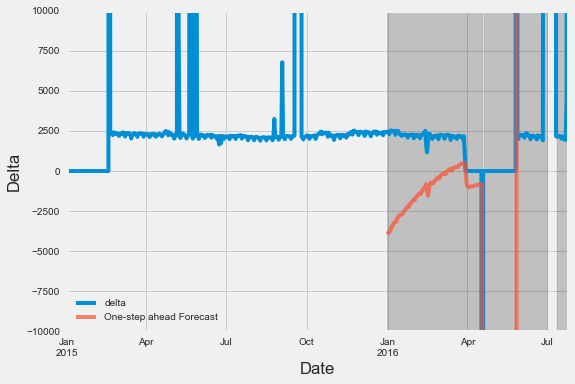

In [100]:
ax = deltaday_train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Delta')
plt.legend()
plt.ylim(-10000,10000)

In [101]:
deltaday_red

NameError: name 'deltaday_red' is not defined

(0, 3500)

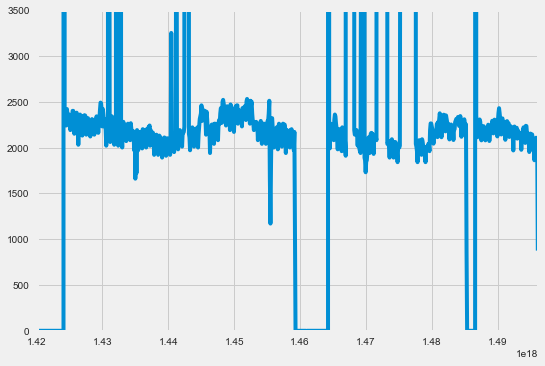

In [108]:
# visualize delta_dayred to evaluate whether stationary or non-stationary

delta_dayred
sns.tsplot(delta_dayred.delta,delta_dayred.index)
plt.ylim([0,3500])

In [109]:
# delta_dayred is clearly non-stationary, as you can see seasonality. Weekly seasonality as well as annual seasonality...
# ... every year, values drop around summer-time, and then pick up again during the school year. 

In [116]:
# second order differencing of delta_dayred data to see if it will remove trend and seasonality
# use np.arrays for slicing benefits to create second difference list

ts = np.array(delta_dayred.index[1:]) #just ts list that will be needed for second diff index
values = np.array(delta_dayred.delta)
secdiff = values[1:]-values[:-1]

In [123]:
# create dataframe of second difference np.array

delta_dayredsec = pd.DataFrame(secdiff)
delta_dayredsec = delta_dayredsec.rename(columns={0:'deltasec'})

delta_dayredsec.index = ts

(-250.0, 250.0)

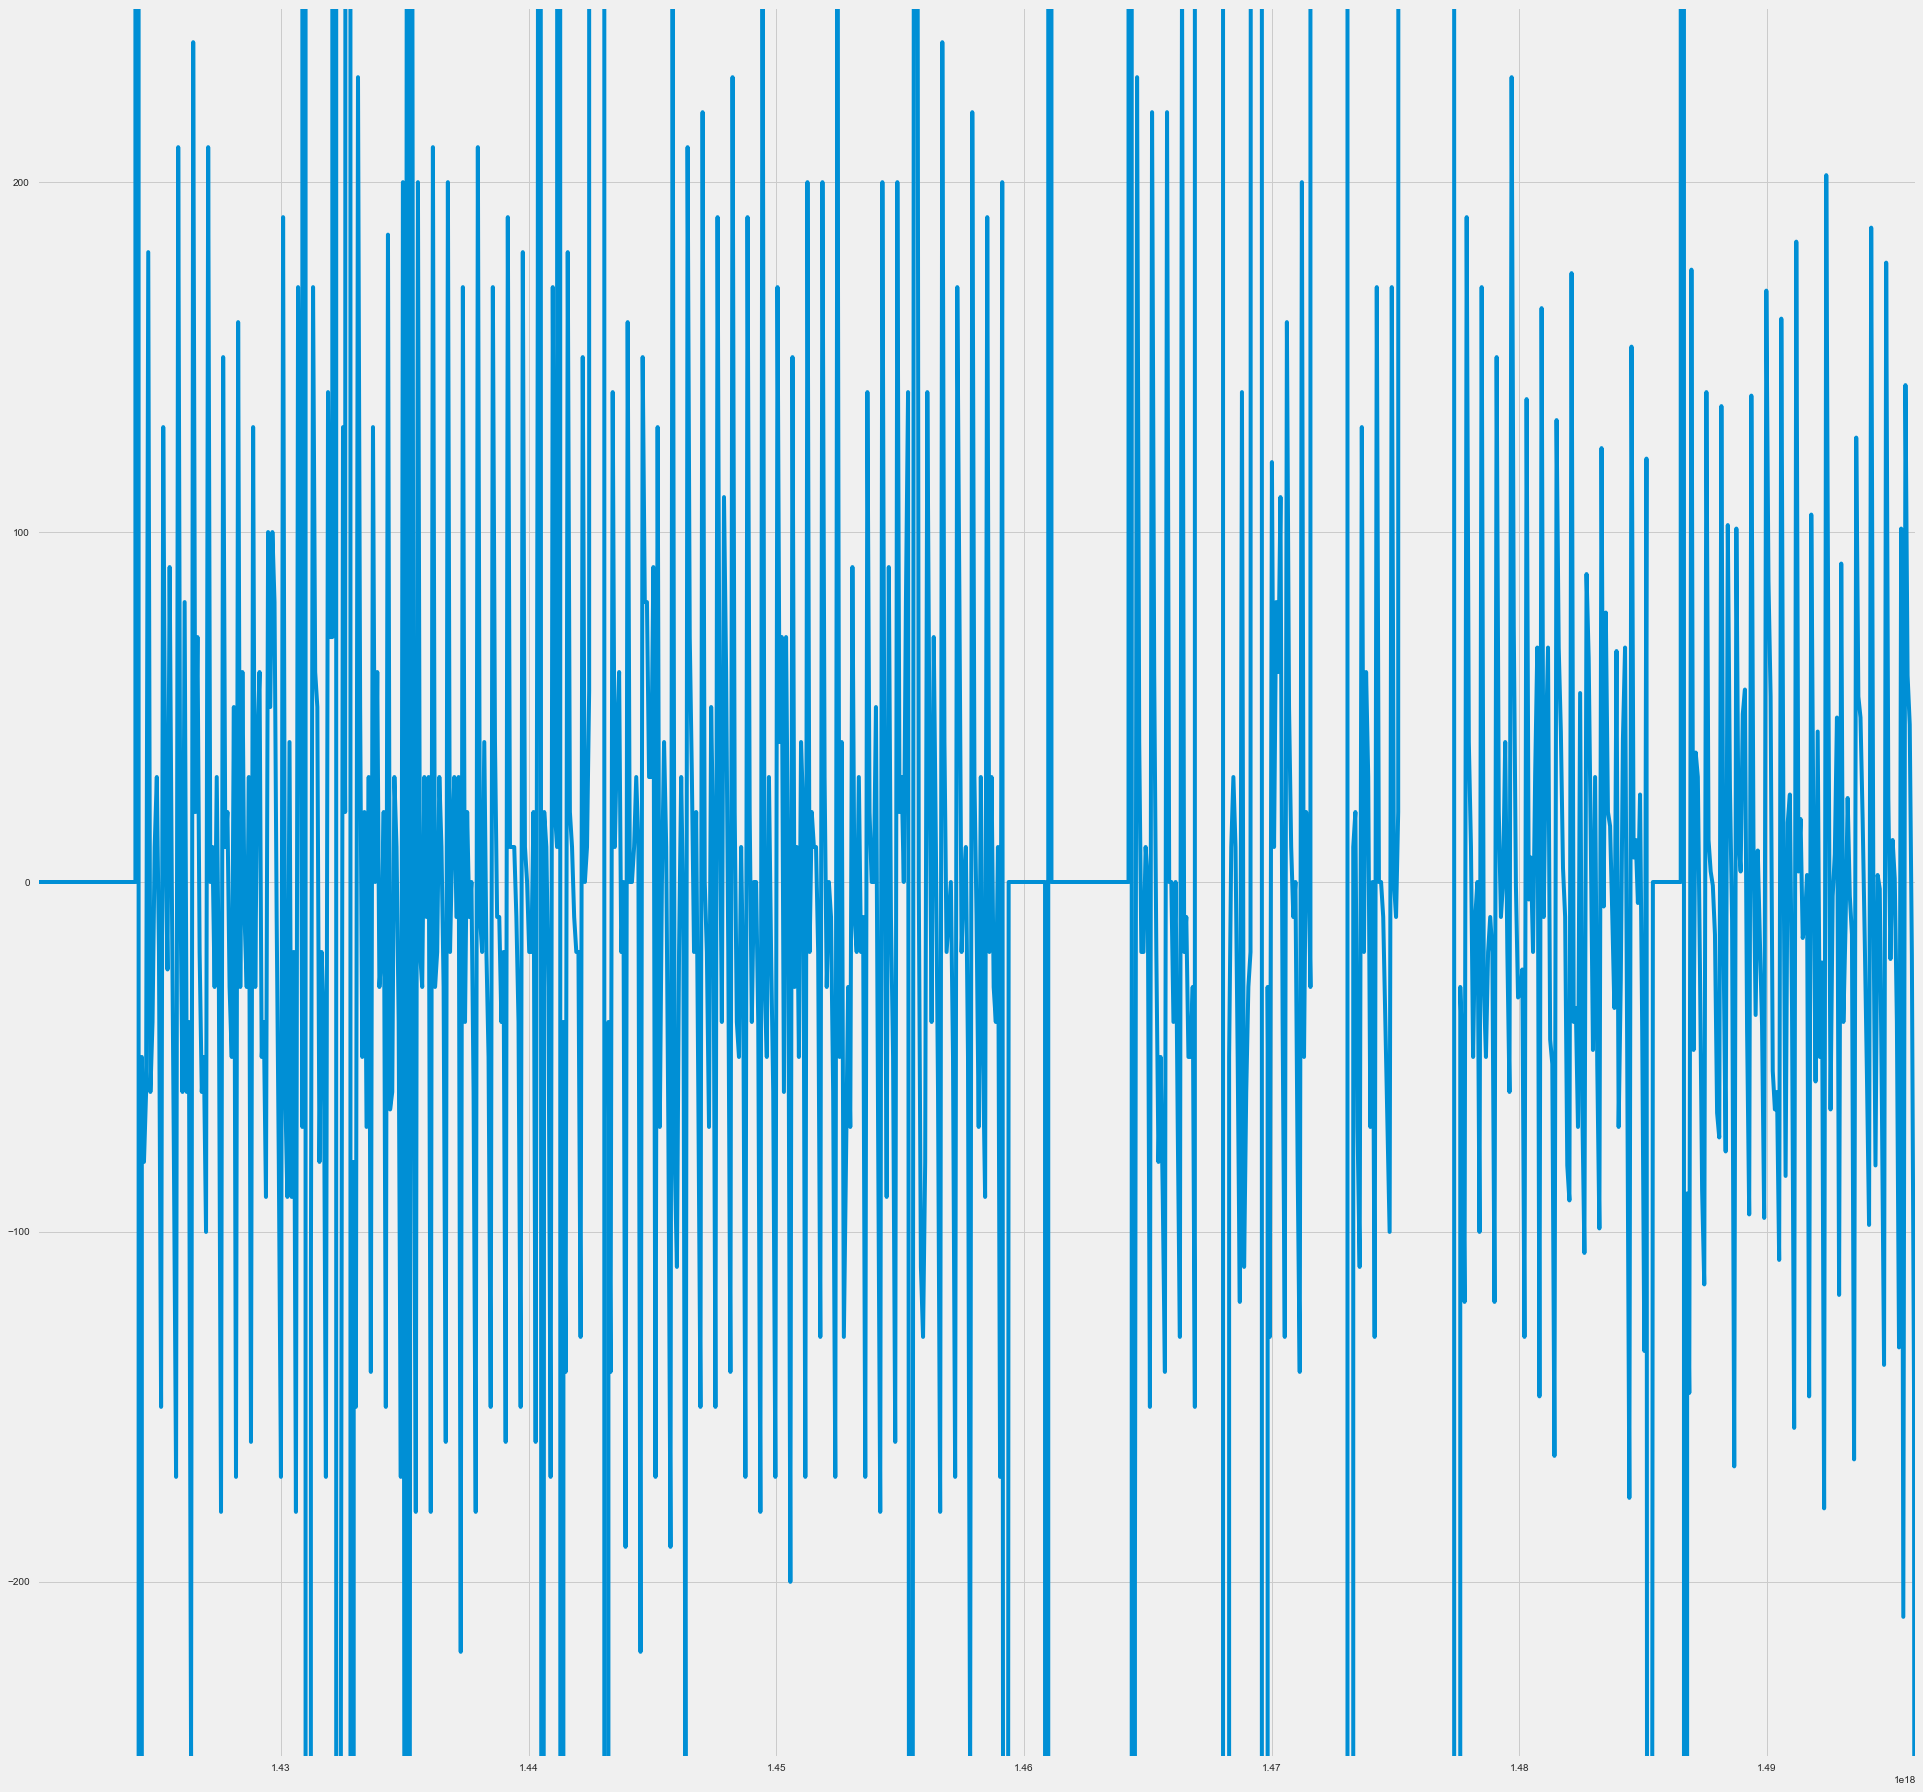

In [140]:
plt.figure(figsize=(30,30))
sns.tsplot(delta_dayredsec.deltasec, delta_dayredsec.index)
plt.ylim([-0.25e3,0.25e3])

In [132]:
#plot seems to be more stationary now!
# do acf plot to double check. 
print(delta_dayredsec.shape)

(879, 1)


(-0.1, 0.1)

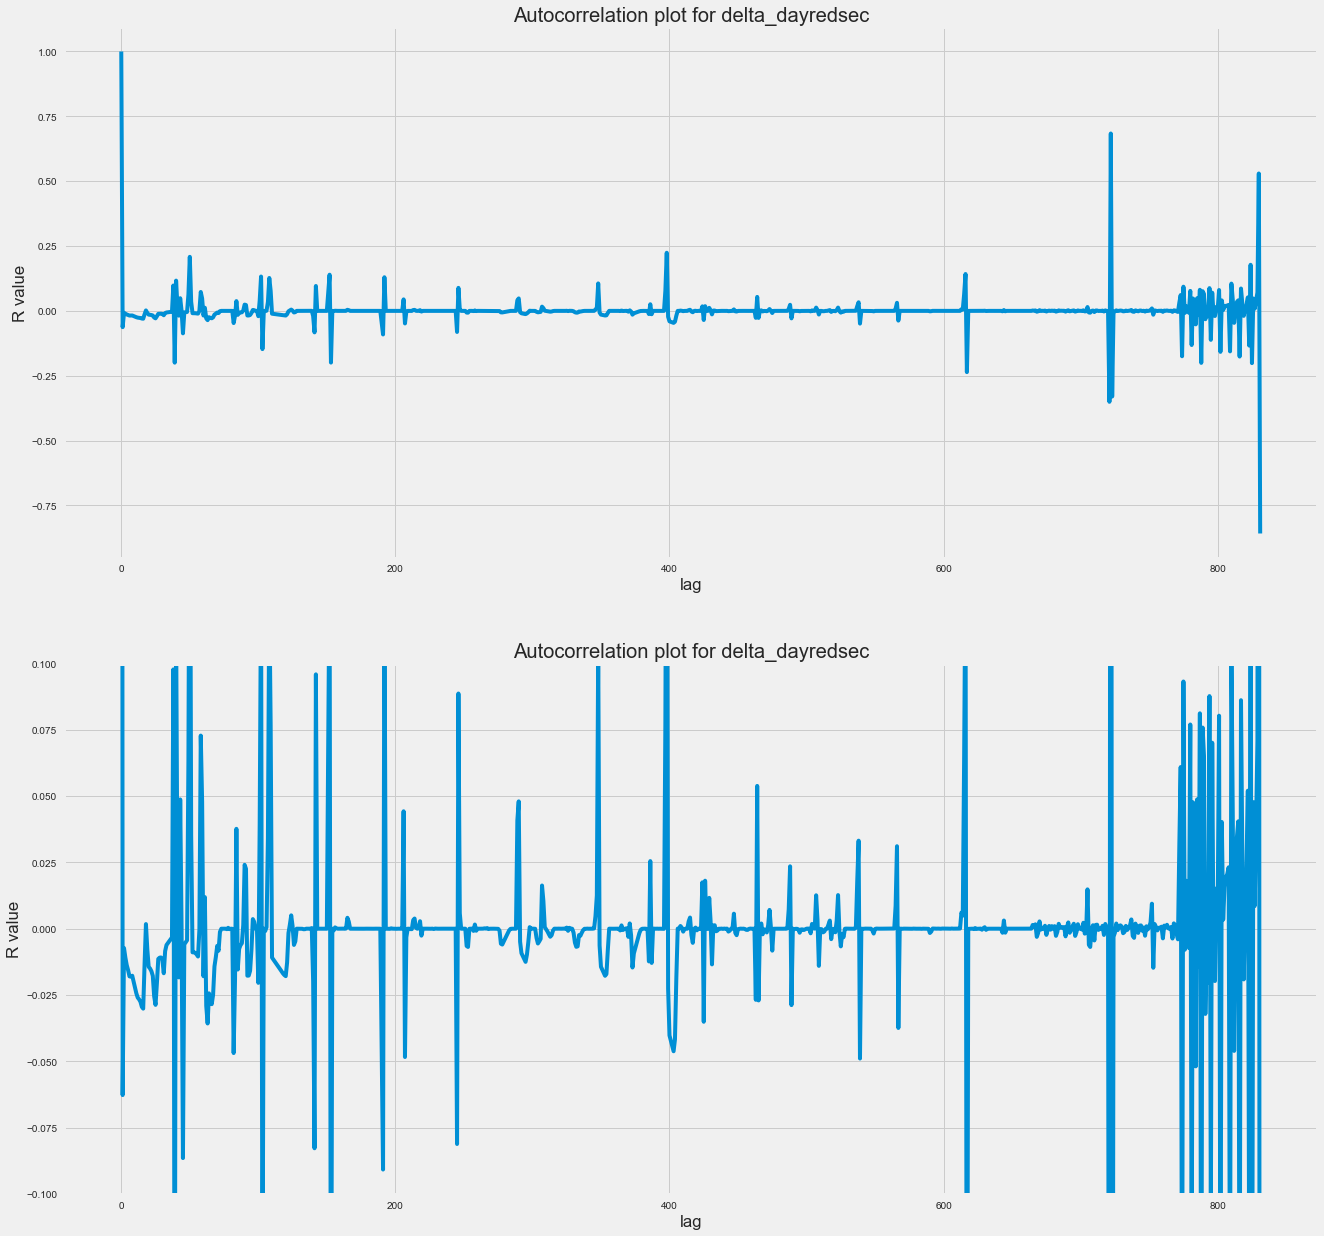

In [138]:
autocorr_list = [delta_dayredsec.deltasec.autocorr(lag=x) for x in range(879)]

plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.plot(autocorr_list)
plt.xlabel('lag')
plt.ylabel('R value')
plt.title('Autocorrelation plot for delta_dayredsec')

plt.subplot(2,1,2)
plt.plot(autocorr_list)
plt.xlabel('lag')
plt.ylabel('R value')
plt.title('Autocorrelation plot for delta_dayredsec')
plt.ylim([-0.1,0.1])


In [139]:
# autocorr graph shows that it drops to values close to zero quickly, but then increases at the end..